In [51]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

In [52]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

In [53]:
heritability_data= {'1': 0.1,
'2': 0.3,
'3': 0.5,
'4': 0.7,
'5': 0.9}

optima_dict = {'optima7': 7,
    'optima6': 6,
               'optima5': 5,
               'optima4': 4,
               'optima3': 3,
               'optima2': 2,
               'optima1.5': 1.5,
               'optima1': 1,
               'optima0': 0}

def get_params(df):
    df = df.reset_index()
    df['index'] = df['index'].str.split('/subp').str[0]
    df['optima'] = df['index'].str.split('/').str[-1]
    df['sel'] = df['index'].str.split('/').str[-2]
    df['h2'] = df['index'].str.split('/').str[-3]
    df['poly'] = df['index'].str.split('_').str[-2]
    df['rep'] = df['index'].str.split('_').str[-1].str.split('/').str[0]
    df = df.drop('index',axis=1)
    return df

In [54]:
pwd

'/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/final_results_es_dep_af'

In [55]:
path = '/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [56]:
#path = '/global/scratch/users/tbellg/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [57]:
pop_size = pd.read_csv(path + 'pop_size_early.csv',  index_col=[0])

pop_size = get_params(pop_size)

In [58]:
pop_size = pop_size[pop_size['optima'] != 'optima1.5']

In [59]:
survival_col = pop_size['9'].isna().replace({True: 0, False: 1})
pop_size['survival']= survival_col

/tmp/ipykernel_220294/409456845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survival_col = pop_size['9'].isna().replace({True: 0, False: 1})


In [60]:
survival = pop_size[['optima', 'sel', 'h2', 'poly', 'rep', 'survival']]

In [61]:
survival['poly'] = survival['poly'].str.replace('pi', '').astype(int)
survival['h2'] = survival['h2'].replace(heritability_data)
survival['optima'] = survival['optima'].replace(optima_dict)

/tmp/ipykernel_220294/2090868807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival['poly'] = survival['poly'].str.replace('pi', '').astype(int)
/tmp/ipykernel_220294/2090868807.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survival['h2'] = survival['h2'].replace(heritability_data)
/tmp/ipykernel_220294/2090868807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [62]:
survival['poly'].unique()

array([   2,    5,   10,  500,   50,  100, 1000,   20,    1])

In [63]:
survival[['optima', 'h2', 'poly']].dtypes

optima      int64
h2        float64
poly        int64
dtype: object

In [64]:
survival

,optima,sel,h2,poly,rep,survival
0,2,estrongsel,0.9,2,11,0
1,2,estrongsel,0.9,2,11,0
2,2,estrongsel,0.9,2,11,0
3,2,estrongsel,0.9,2,11,0
4,2,estrongsel,0.9,2,11,0
...,...,...,...,...,...,...
48595,0,estrongsel,0.5,500,23,1
48596,0,estrongsel,0.5,500,23,1
48597,0,estrongsel,0.5,500,23,1
48598,0,estrongsel,0.5,500,23,1


In [65]:
# Assuming your DataFrame is named 'survival'
# Add a constant to the model for the intercept
X = survival[['optima', 'h2', 'poly']]
X = sm.add_constant(X)  # Adds an intercept term to the model
y = survival['survival']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.273455
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               survival   No. Observations:                43200
Model:                          Logit   Df Residuals:                    43196
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Jun 2025   Pseudo R-squ.:                  0.5369
Time:                        15:16:56   Log-Likelihood:                -11813.
converged:                       True   LL-Null:                       -25508.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6993      0.054    -50.350      0.000      -2.804      -2.594
optima        -1.1066      0.

In [66]:
 -1.1066/0.012

-92.21666666666667

In [67]:
7.2021/0.090

80.02333333333333

In [68]:
0.0012/5.04e-05

23.809523809523807

In [69]:
logit_res.params.values / logit_res.bse.values

NameError: name 'logit_res' is not defined

In [ ]:
def calculate_coef_statsmodels(param, sub_dataframes):
    coef = pd.DataFrame(columns=['name', 'intercept', 'p_value_int', 'slope', 'actual_slope','p_value_slope'])
    # Print sub-DataFrames
    for sub_df in sub_dataframes:
        #sub_df[param] = sub_df[param].astype(float)
        first_row =sub_df.iloc[0]
        name = '_'.join(str(value) for value in first_row)
        if (sub_df['survival'] == 1).all():
            intercept = 1
            slope = 0 
            p_value_slope = np.nan
            p_value_int = np.nan
            actual_slope = 0
        elif (sub_df['survival'] == 0).all():
            intercept = 0
            slope = 0 
            p_value_slope = np.nan
            p_value_int = np.nan 
            actual_slope = 0
        else:
            x = np.array(sub_df[param]).reshape(-1, 1)
            x_with_intercept = sm.add_constant(x)
            y = sub_df['survival']
            
            logit_mod = sm.Logit(y, x_with_intercept)
            
            logit_res = logit_mod.fit_regularized() #method='l1', L1_wt=0, alpha =0.1)
            actual_slope = logit_res.params['x1']
            intercept, slope = logit_res.params.values / logit_res.bse.values
            p_values = logit_res.pvalues
            p_value_int = p_values['const']
            p_value_slope = p_values['x1']
        new_row = {
                'name': name,
                'intercept': intercept,
                'slope': slope,
                'actual_slope': actual_slope,
                'p_value_slope': p_value_slope,
                'p_value_int': p_value_int}

        coef.loc[len(coef)] = new_row
    return coef

In [ ]:
params = ['optima', 'h2', 'poly']

#params_dicts = [optima_dict, heritability_data, poligenicity_data]

In [70]:
all_coef = {}
for i in params:
    params1 = params.copy()
    params1.remove(i)
    survival1 = survival.copy()    
    ##standarize the column to analize 
    if i == 'poly':
        survival1['poly'] = np.log(survival1['poly'])
    survival1[i] = survival1[i].astype(float)
    survival1[i] = (survival1[i] - survival1[i].mean()) /  survival1[i].std()
    

    print(i)
    # Create a groupby object based on specified columns
    grouped = survival1.groupby(params1)
    # Iterate through groups and create sub-DataFrames
    sub_dataframes = [group for _, group in grouped]
    sub_dataframes = [df for df in sub_dataframes if len(df) >= 2]
    coef_df = calculate_coef_statsmodels(i, sub_dataframes)
    
    all_coef[i] = coef_df

optima
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005006078877452017
            Iterations: 45
            Function evaluations: 45
            Gradient evaluations: 45
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.00500607887745201
            Iterations: 45
            Function evaluations: 45
            Gradient evaluations: 45
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26446256073266344
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29634586453221756
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3061478914663808
            Iterations: 15
            

In [71]:
all_coef = pd.concat(all_coef).reset_index().drop('level_1',axis=1)

In [72]:
all_coef[['optima', 'sel', 'h2', 'poly', 'rep', 'survival']]= all_coef['name'].str.split('_', expand=True)

all_coef = all_coef.drop('survival',axis=1)

all_coef = all_coef.rename(columns={'level_0':'param'})

In [73]:
all_coef['optima'].unique()

array(['-0.6546460936540506', '0', '1', '2', '3', '4', '5', '6', '7'],
      dtype=object)

In [74]:
all_coef['param'].value_counts()

param
h2        72
optima    36
poly      32
Name: count, dtype: int64

In [75]:
for i,j in zip(['h2', 'optima', 'poly'], [72,36,32]):
    all_coef.loc[(all_coef['p_value_slope'] > 0.05/j) & (all_coef['param'] == i), 'slope'] = np.nan

In [76]:
all_coef = all_coef.dropna()

In [77]:
all_coef[all_coef['param'] == 'poly']['slope'].describe()

count    17.000000
mean      5.914364
std       9.145209
min      -4.801381
25%      -3.510654
50%       8.035491
75%      15.384924
max      17.357132
Name: slope, dtype: float64

In [78]:
all_coef[all_coef['param'] == 'poly']

,param,name,intercept,p_value_int,slope,actual_slope,p_value_slope,optima,sel,h2,poly,rep
110,poly,0_estrongsel_0.7_-1.14048451119154_11_1,9.688928,3.360358e-22,3.718799,1.807115,2.001726e-04,0,estrongsel,0.7,-1.14048451119154,11
111,poly,0_estrongsel_0.9_-1.14048451119154_11_1,19.335650,2.692550e-83,8.035491,1.172841,9.320521e-16,0,estrongsel,0.9,-1.14048451119154,11
113,poly,1_estrongsel_0.5_-1.14048451119154_11_0,5.788166,7.115899e-09,12.966106,0.841678,1.904621e-38,1,estrongsel,0.5,-1.14048451119154,11
114,poly,1_estrongsel_0.7_-1.14048451119154_11_0,15.176014,5.098382e-52,15.782606,5.058421,4.099062e-56,1,estrongsel,0.7,-1.14048451119154,11
115,poly,1_estrongsel_0.9_-1.14048451119154_11_0,14.839078,8.187410e-50,15.384924,5.792313,2.066201e-53,1,estrongsel,0.9,-1.14048451119154,11
118,poly,2_estrongsel_0.7_-1.14048451119154_11_0,16.629940,4.230188e-62,16.071764,1.951899,4.024712e-58,2,estrongsel,0.7,-1.14048451119154,11
119,poly,2_estrongsel_0.9_-1.14048451119154_11_0,16.024868,8.567295e-58,16.470826,3.376499,5.945256e-61,2,estrongsel,0.9,-1.14048451119154,11
122,poly,3_estrongsel_0.7_-1.14048451119154_11_1,3.545614,3.916994e-04,12.331017,0.773105,6.166349e-35,3,estrongsel,0.7,-1.14048451119154,11
123,poly,3_estrongsel_0.9_-1.14048451119154_11_1,15.413792,1.322202e-53,17.357132,2.334707,1.742104e-67,3,estrongsel,0.9,-1.14048451119154,11
125,poly,4_estrongsel_0.5_-1.14048451119154_11_1,-19.878246,6.279033e-88,-3.510654,-0.623802,4.470057e-04,4,estrongsel,0.5,-1.14048451119154,11


In [79]:
all_coef[all_coef['param'] == 'h2']['slope'].describe()

count    40.000000
mean      9.048261
std       2.983661
min       3.926601
25%       6.795009
50%      10.268112
75%      11.693652
max      13.312637
Name: slope, dtype: float64

In [80]:
all_coef[all_coef['param'] == 'h2']['p_value_slope'].describe()

count    4.000000e+01
mean     4.021778e-06
std      1.606400e-05
min      1.954588e-40
25%      1.398721e-31
50%      9.841622e-25
75%      1.265402e-11
max      8.615485e-05
Name: p_value_slope, dtype: float64

In [81]:
all_coef[(all_coef['optima'].isin(['0','1', '2', '3'])) & (all_coef['param'] == 'poly')]['slope'].describe()

count     9.000000
mean     13.124296
std       4.541399
min       3.718799
25%      12.331017
50%      15.384924
75%      16.071764
max      17.357132
Name: slope, dtype: float64

In [82]:
all_coef[(all_coef['optima'].isin(['0','1', '2', '3'])) & (all_coef['param'] == 'poly')]['p_value_slope'].describe()

count    9.000000e+00
mean     2.224140e-05
std      6.672420e-05
min      1.742104e-67
25%      4.024712e-58
50%      2.066201e-53
75%      6.166349e-35
max      2.001726e-04
Name: p_value_slope, dtype: float64

In [83]:
all_coef[(all_coef['optima'].isin(['5', '6', '7'])) & (all_coef['param'] == 'poly')]['slope'].describe()

count    6.000000
mean    -4.050711
std      0.624944
min     -4.801381
25%     -4.576028
50%     -4.004601
75%     -3.558617
max     -3.317222
Name: slope, dtype: float64

In [84]:
all_coef[(all_coef['optima'].isin(['5', '6', '7'])) & (all_coef['param'] == 'poly')]['p_value_slope'].describe()

count    6.000000
mean     0.000269
std      0.000379
min      0.000002
25%      0.000011
50%      0.000070
75%      0.000447
max      0.000909
Name: p_value_slope, dtype: float64

In [85]:
all_coef.groupby('param')['slope'].describe()

,count,mean,std,min,25%,50%,75%,max
param,,,,,,,,
h2,40.0,9.048261,2.983661,3.926601,6.795009,10.268112,11.693652,13.312637
optima,27.0,-14.720946,2.136707,-18.654307,-15.791505,-15.101201,-13.280969,-9.597331
poly,17.0,5.914364,9.145209,-4.801381,-3.510654,8.035491,15.384924,17.357132


In [86]:
all_coef.groupby('param')['p_value_slope'].describe()

,count,mean,std,min,25%,50%,75%,max
param,,,,,,,,
h2,40.0,4.021778e-06,1.606400e-05,1.954588e-40,1.398721e-31,9.841622e-25,1.265402e-11,8.615485e-05
optima,27.0,3.038664e-23,1.578878e-22,1.165031e-77,5.504548e-56,1.590094e-51,4.846290e-40,8.204104e-22
poly,17.0,1.330132e-04,2.613788e-04,1.742104e-67,2.066201e-53,9.320521e-16,1.018160e-04,9.091735e-04


/tmp/ipykernel_220294/739959338.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Heritability', 'Polygenicity', 'SD to new optimum'])


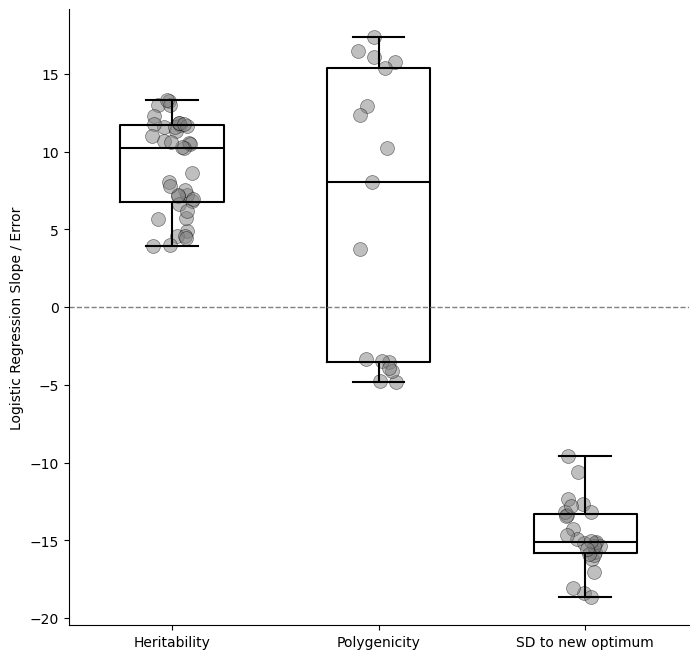

In [87]:
plt.figure(figsize=(8, 8))
ax = plt.gca()  # Get current axis

sns.stripplot(
    data=all_coef,
    y='slope',
    x='param',
    order=['h2', 'poly', 'optima'],
    color='grey',
    edgecolor='black',   # <-- adds black border
    linewidth=0.5,       # <-- controls thickness of border
    alpha=0.5,
    s=10,
    zorder=1,
    ax=ax
)

# Create the boxplot with a higher zorder (so it's on top)
sns.boxplot(data=all_coef, y='slope', x='param', 
            order=['h2', 'poly', 'optima'], showfliers=False, 
            color='black', width=0.5, zorder=2, ax=ax, fill=False)

# Horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

sns.despine()

# Customize x-tick labels
ax.set_xticklabels(['Heritability', 'Polygenicity', 'SD to new optimum'])
ax.set_ylabel('Logistic Regression Slope / Error')
ax.set_xlabel('')


plt.savefig("figures/lr_results_parameters.pdf",bbox_inches='tight')
plt.savefig("figures/lr_results_parameters.png", format='png', bbox_inches='tight')

plt.show()

In [40]:
survivorship_fpoly = survival.groupby(['h2', 'optima'])['survival'].sum() / survival.groupby(['h2', 'optima'])['survival'].size()

In [41]:
survivorship_fpoly = survivorship_fpoly.reset_index()

In [42]:
survivorship_fpoly = survivorship_fpoly.pivot_table(index='optima', columns = 'h2', values = 'survival')

In [43]:
survivorship_fpoly = survivorship_fpoly.iloc[::-1]


In [44]:
colors = ["purple", "white", "green"]  # Purple for negative, white for zero, green for positive
cmap_survival = mcolors.LinearSegmentedColormap.from_list(name='custom', colors=colors) # vmin=0, vmax=1
cmap_survival = mcolors.LinearSegmentedColormap.from_list(name='custom', colors=[(0, "#808080"), (1, "white")])

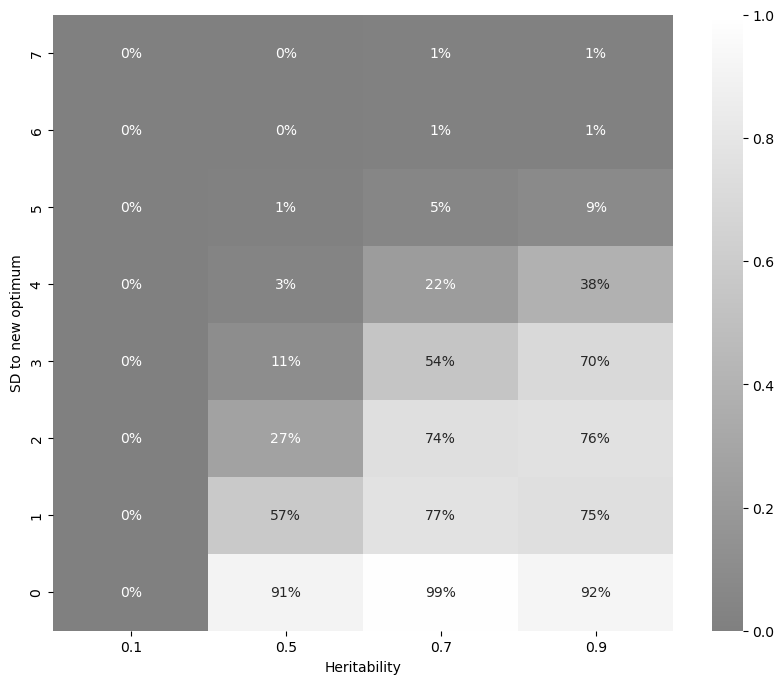

In [45]:
plt.figure(figsize=(10, 8))  # Width, height in inches
sns.heatmap(survivorship_fpoly,cmap=cmap_survival,vmin=0, vmax=1,annot=True,fmt=".000%")
           #cbar_kws={'orientation': 'horizontal'})
# Rename x and y axes
plt.xlabel("Heritability")
plt.ylabel("SD to new optimum")

# Save the figure as a PDF
plt.savefig("figures/heatmap_survivorship.pdf", format='pdf', bbox_inches='tight', transparent=True)
plt.savefig("figures/heatmap_survivorship.png", format='png', bbox_inches='tight', transparent=True,
           dpi=300)
#plt.gca().collections[0].colorbar.ax.set_position([0.15, 0.9, 0.7, 0.03])  # [left, bottom, width, height]

plt.show()  # Show the plot

In [46]:
poly_coef = all_coef[all_coef['param'] == 'poly']

In [50]:
poly_coef

,param,name,intercept,p_value_int,slope,actual_slope,p_value_slope,optima,sel,h2,poly,rep
9,optima,-0.6546460936540506_estrongsel_0.5_1_27_0,-14.981438,9.709326e-51,-13.361057,-2.656685,1.021043e-40,-0.6546460936540506,estrongsel,0.5,1,27
10,optima,-0.6546460936540506_estrongsel_0.5_2_11_0,-15.653356,3.151504e-55,-14.248163,-2.415612,4.602312e-46,-0.6546460936540506,estrongsel,0.5,2,11
11,optima,-0.6546460936540506_estrongsel_0.5_5_13_0,-15.555304,1.464584e-54,-15.150972,-2.501602,7.465397e-52,-0.6546460936540506,estrongsel,0.5,5,13
12,optima,-0.6546460936540506_estrongsel_0.5_10_27_0,-14.634981,1.680217e-48,-16.177493,-3.066519,7.269463e-59,-0.6546460936540506,estrongsel,0.5,10,27
13,optima,-0.6546460936540506_estrongsel_0.5_20_11_1,-14.352259,1.031226e-46,-15.728093,-3.536406,9.709089e-56,-0.6546460936540506,estrongsel,0.5,20,11
14,optima,-0.6546460936540506_estrongsel_0.5_50_27_0,-14.254537,4.200771e-46,-15.921857,-3.523376,4.469124e-57,-0.6546460936540506,estrongsel,0.5,50,27
15,optima,-0.6546460936540506_estrongsel_0.5_100_27_0,-14.145324,1.995957e-45,-15.367272,-3.873357,2.713572e-53,-0.6546460936540506,estrongsel,0.5,100,27
16,optima,-0.6546460936540506_estrongsel_0.5_500_9_0,-14.110686,3.263857e-45,-15.192347,-3.960695,3.974341e-52,-0.6546460936540506,estrongsel,0.5,500,9
17,optima,-0.6546460936540506_estrongsel_0.5_1000_26_1,-14.110252,3.284037e-45,-15.101201,-3.977485,1.590094e-51,-0.6546460936540506,estrongsel,0.5,1000,26
18,optima,-0.6546460936540506_estrongsel_0.7_1_27_0,-17.454531,3.179771e-68,-13.196030,-1.319024,9.248159e-40,-0.6546460936540506,estrongsel,0.7,1,27


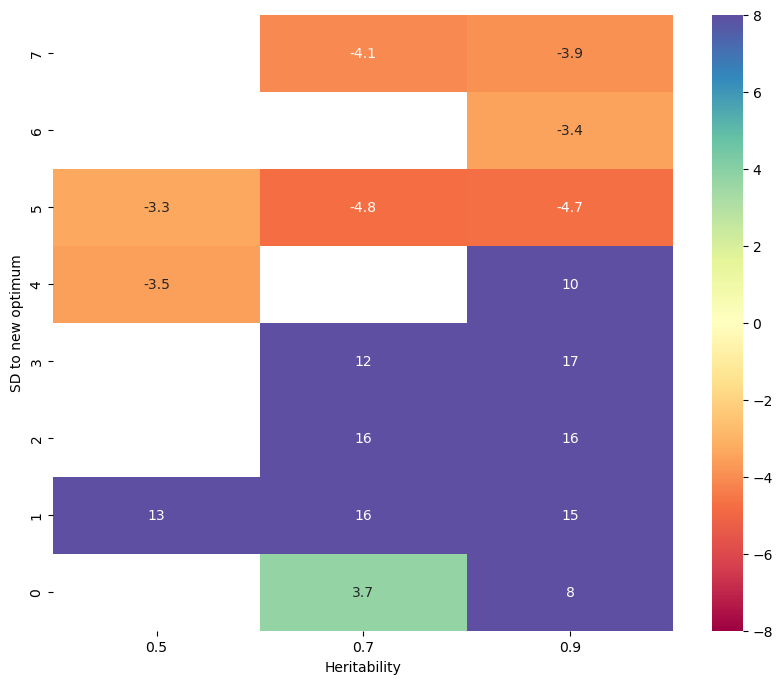

In [47]:

poly_survival = poly_coef.pivot_table(index='optima', columns = 'h2', values = 'slope')

poly_survival = poly_survival.iloc[::-1]


poly_survival = poly_survival.replace(0,np.nan)

poly_survival

norm = mcolors.TwoSlopeNorm(vmin=-8, vcenter=0, vmax=8)

custom_colors = sns.color_palette("Spectral",as_cmap=True) # , n_colors=len(custom_categories)

plt.figure(figsize=(10, 8)) 
sns.heatmap(poly_survival, norm=norm, cmap =custom_colors, annot=True)
plt.xlabel("Heritability")
plt.ylabel("SD to new optimum")

plt.savefig("figures/heatmap_poly_relevance.pdf", format='pdf', bbox_inches='tight', transparent=True)
plt.savefig("figures/heatmap_poly_relevance.png", format='png', bbox_inches='tight', transparent=True,
           dpi=300)
plt.show()

In [48]:
poly_coef = all_coef[all_coef['param'] == 'optima']

In [49]:
poly_str_order = ['1', '2', '5', '10', '20', '50', '100', '500', '1000']

<Axes: xlabel='h2', ylabel='poly'>

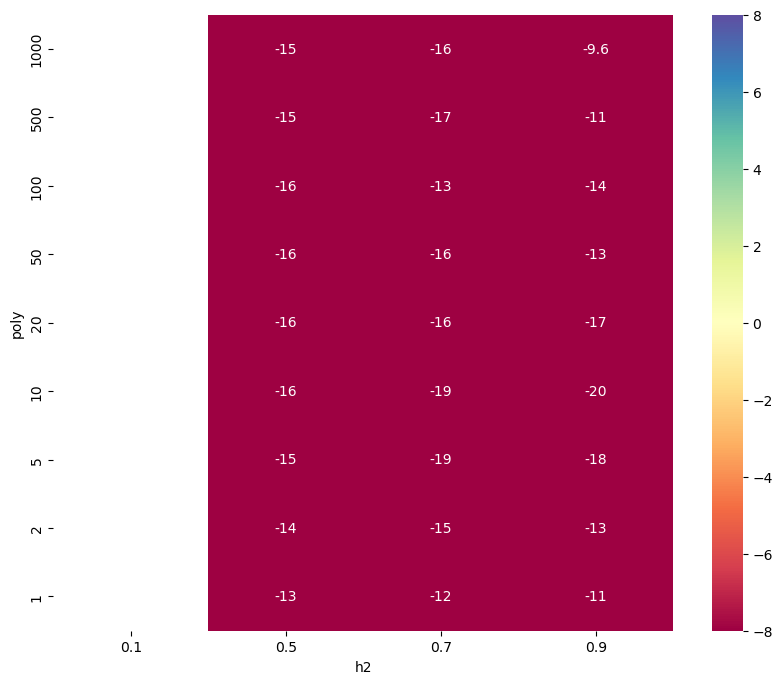

In [47]:
poly_survival = poly_coef.pivot_table(index='poly', columns = 'h2', values = 'slope')
poly_survival = poly_survival.reindex(poly_str_order)
poly_survival = poly_survival.iloc[::-1]


poly_survival = poly_survival.replace(0,np.nan)

poly_survival

norm = mcolors.TwoSlopeNorm(vmin=-8, vcenter=0, vmax=8)

custom_colors = sns.color_palette("Spectral",as_cmap=True) # , n_colors=len(custom_categories)

plt.figure(figsize=(10, 8)) 

sns.heatmap(poly_survival, norm=norm, cmap =custom_colors, annot=True)

In [114]:
poly_survival

h2,0.1,0.5,0.7,0.9
poly,,,,
1000,NaN,-15.008626,-15.897993,-9.603283
500,NaN,-15.110234,-16.827600,-10.625098
100,NaN,-15.509542,-13.285813,-13.545595
50,NaN,-16.090119,-15.601593,-13.021280
20,NaN,-15.822636,-15.991527,-16.619646
10,NaN,-16.334301,-19.391380,-20.162251
5,NaN,-15.049895,-19.302449,-17.956059
2,NaN,-13.929888,-14.877156,-13.064138
1,NaN,-12.938584,-12.380331,-11.468605


Text(92.25, 0.5, 'SD to new optimum')

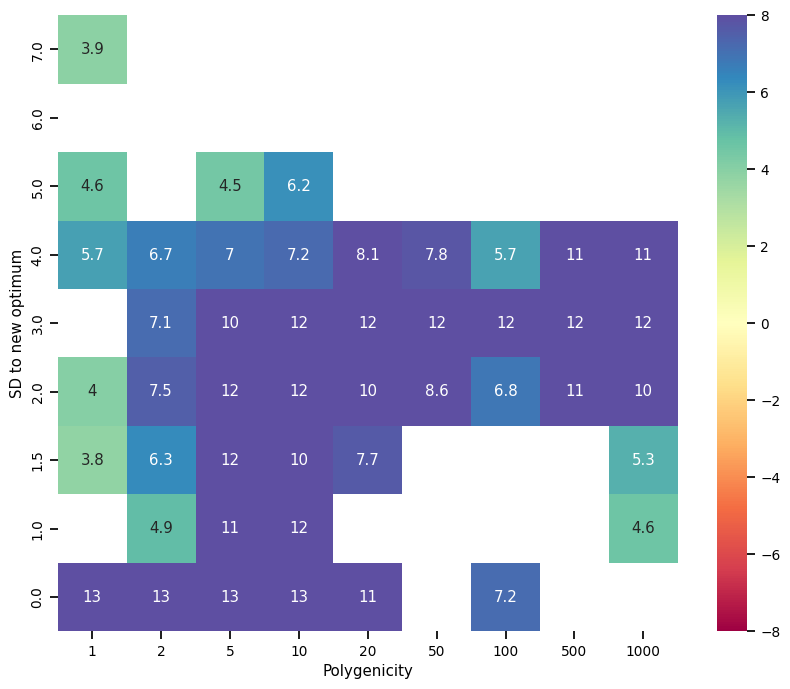

In [115]:
poly_coef = all_coef[all_coef['param'] == 'h2']
poly_survival = poly_coef.pivot_table(index='optima', columns = 'poly', values = 'slope')
poly_survival = poly_survival[poly_str_order]
poly_survival = poly_survival.iloc[::-1]


poly_survival = poly_survival.replace(0,np.nan)

poly_survival

norm = mcolors.TwoSlopeNorm(vmin=-8, vcenter=0, vmax=8)

custom_colors = sns.color_palette("Spectral",as_cmap=True) # , n_colors=len(custom_categories)

plt.figure(figsize=(10, 8)) 
sns.heatmap(poly_survival, norm=norm, cmap =custom_colors, annot=True)
plt.xlabel("Polygenicity")
plt.ylabel("SD to new optimum")